# Python Stats Assignment 

## Zianne Olverson

### Import of modules

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

## Reading in data

In [212]:
data = pd.read_csv('brain_size.csv', sep=';', na_values='.')
print(data.head())

   Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0           1  Female   133  132  124   118.0    64.5     816932
1           2    Male   140  150  124     NaN    72.5    1001121
2           3    Male   139  123  150   143.0    73.3    1038437
3           4    Male   133  129  128   172.0    68.8     965353
4           5  Female   137  132  134   147.0    65.0     951545


# Creating 3 arrays from the data

In [213]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

# Creating dataframe using 3 arrays

In [214]:
pd.DataFrame({'t':t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


# Observing and manipulating the data

In [215]:
data.shape

(40, 8)

### Data has 40 rows and 8 columns

In [216]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

# Printing gender names in columns

In [217]:
print(data['Gender'].head())

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object


# Mean VIQ for females within the dataframe

In [218]:
data[data['Gender'] == 'Female'] ['VIQ'].mean()

np.float64(109.45)

# Grouping the dataframe by gender and displaying mean VIQ for both genders

In [219]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
      print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


# Display of mean stats from both genders

In [220]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


# Plotting the data

### Plotting Scatter Matrix of Weight, Height and MRI Count data 

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

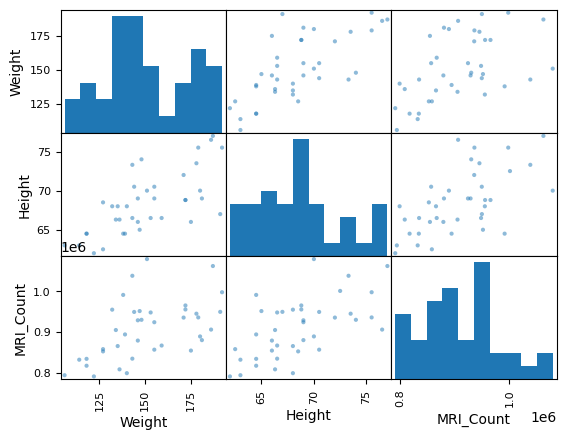

In [221]:
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

### Plotting Scatter Matrix of PIQ, VIQ and FSIQ

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

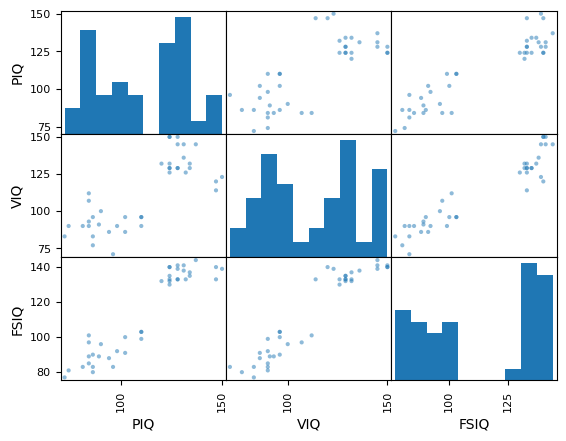

In [222]:
scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

# Hypothesis testing on the data

## Student's t-tests

### Testing value of population VIQ mean using 1-sample t-test

In [223]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

### Testing difference across in VIQ populations using 2-sample t-test to determine significance

In [224]:
female_viq = data[data['Gender'] == 'Female'] ['VIQ']
male_viq = data[data['Gender'] == 'Male'] ['VIQ']

In [225]:
t_statistic, p_value = stats.ttest_ind(female_viq, male_viq)

In [226]:
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.7726161723275012
P-Value: 0.44452876778583217


## 2-sample t-test to determine if FSIQ and PIQ are sig dif

In [227]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

### Results for this aren't accurate because FSIQ and PIQ are measured in the same individual so a paired test needs to be run instead

# Paired tests to determine if FSIQ and PIQ are different in individuals

In [228]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

## 1-sample t-test to determine if FSIQ and PIQ are different in individuals

### Same results as the paired test

In [229]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

## Wilcoxon signed-rank test to relax Gaussian errors

In [230]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

# Creating simulated data for a linear model

In [231]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)

## Random distributed noise 

In [232]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

## Creating a dataframe containing relevant variables

In [233]:
data = pd.DataFrame({'x': x, 'y':y})

# Specifying and fitting an OLS model 

In [234]:
model = ols("y ~ x", data).fit()

## Inspecting the statistics of the model

In [235]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        06:11:23   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

# Observing data and comparing groups/categories

In [236]:
print(data.head())

          x          y
0 -5.000000 -13.502619
1 -4.473684 -20.868078
2 -3.947368 -18.954792
3 -3.421053 -19.555032
4 -2.894737 -10.222580


# Comparison of IQ between male and female using Linear Model

In [237]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

In [238]:
print(data.columns)

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')


In [239]:
model = ols("VIQ ~ Gender + 1", data=data).fit()

In [240]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sat, 13 Jul 2024   Prob (F-statistic):              0.445
Time:                        06:11:24   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

# Integer column to be treated as categorical

In [241]:
model = ols('VIQ ~ C(Gender)', data).fit()

## Linking to t-test between different FSIQ and PIQ

In [242]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))

In [243]:
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


# OLS Regression

In [244]:
model = ols("iq ~ type", data_long).fit()

In [245]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Sat, 13 Jul 2024   Prob (F-statistic):              0.643
Time:                        06:11:26   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

# t-test results similar to regression results

In [246]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

# Reading in iris data

In [247]:
data = pd.read_csv('iris.csv')

# OLS regression results

In [248]:
model = ols('sepal_width ~ name + petal_length', data).fit()

In [249]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        06:11:27   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

# ANOVA (Post HOC analysis testing) to see if significant variance

In [250]:
print(model.f_test([0, 1, -1, 0]))  

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>


In [251]:
print(data)  

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


# Seaborn statistical exploration

### Library imports

In [252]:
import urllib
import os
import urllib.request
from matplotlib import pyplot as plt

In [253]:
import seaborn

In [254]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                               'wages.txt')

# Assigning names

In [255]:
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                   header=None, engine='python')  # Using engine='python' for skipfooter
data.columns = short_names

# Scatter Matricies Data and Pairplots

In [256]:
print(data)  

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION   WAGE  AGE  RACE  OCCUPATION  \
0            8      0    1          21      0   5.10   35     2           6   
1            9      0    1          42      0   4.95   57     3           6   
2           12      0    0           1      0   6.67   19     3           6   
3           12      0    0           4      0   4.00   22     3           6   
4           12      0    0          17      0   7.50   35     3           6   
..         ...    ...  ...         ...    ...    ...  ...   ...         ...   
529         18      0    0           5      0  11.36   29     3           5   
530         12      0    1          33      0   6.10   51     1           5   
531         17      0    1          25      1  23.25   48     1           5   
532         12      1    0          13      1  19.88   31     3           5   
533         16      0    0          33      0  15.38   55     3           5   

     SECTOR  MARR  
0         1     1  
1         1

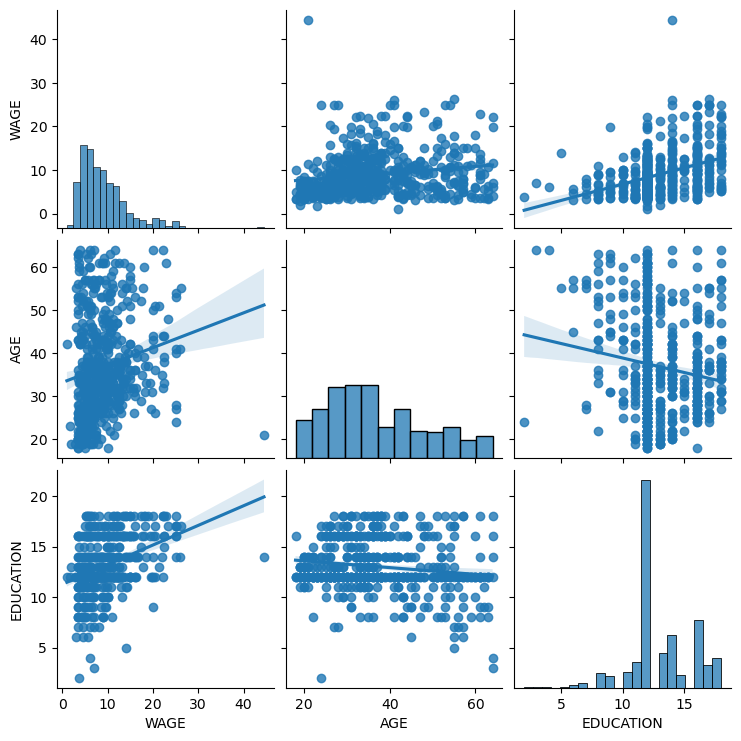

In [257]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')  

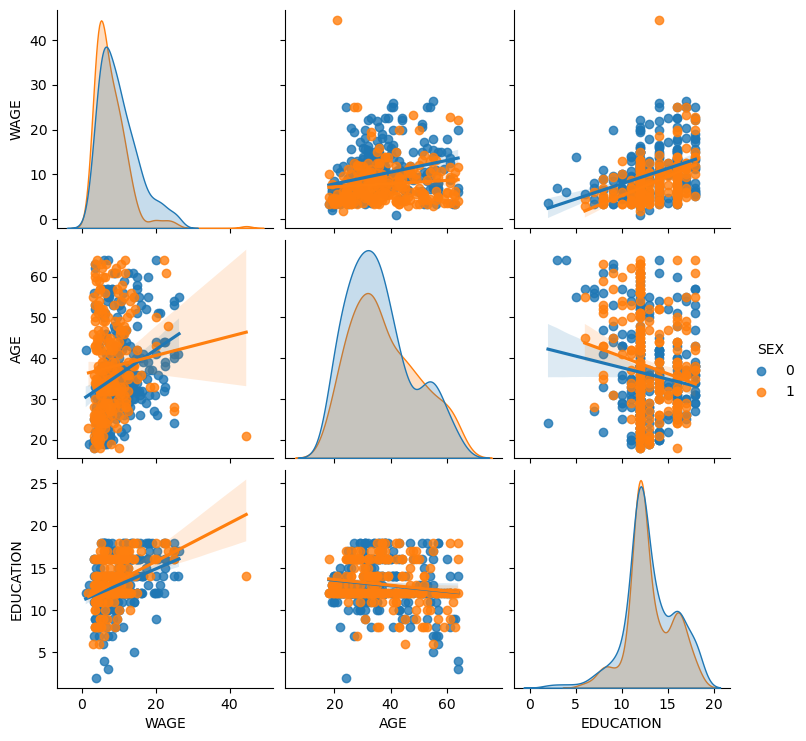

In [258]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX') 

In [259]:
plt.rcdefaults()

# Univariate Regression plot

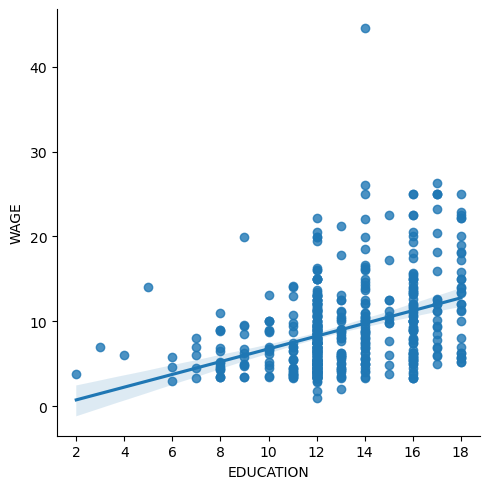

In [260]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

# Testing interactions between groups

In [261]:
formula = 'WAGE ~ EDUCATION + SEX + EDUCATION * SEX'

In [262]:
model = sm.OLS.from_formula(formula, data=data)

In [263]:
result = model.fit()

In [264]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.24e-24
Time:                        06:11:41   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1046      1.314      0.841

# Log-transform of wages because they typically are increased with multiplicative factors

In [265]:
data['WAGE'] = np.log10(data['WAGE'])

# Plotting Scatter Matrix Plots

In [ ]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

# Plotting Regression

In [ ]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)
plt.show()